In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [3]:
# Import the dataset
ab_data = pd.read_csv('/content/AB_Test_Results.csv')

print(ab_data.head())

   USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0


# Data Understanding

In [4]:
# TODO: DataFrame Information
print("DataFrame Information:")
ab_data.info()

# TODO: Columns in DataFrame
print("\nColumns in DataFrame:")
print(ab_data.columns)

# TODO: Counting Missing Values
print("\nCounting Missing Values:")
print(ab_data.isnull().sum())

# TODO: Descriptive Statistics
print("\nDescriptive Statistics:")
print(ab_data.describe())

# TODO: Value Counts for VARIANT_NAME
print("\nValue Counts for VARIANT_NAME:")
print(ab_data['VARIANT_NAME'].value_counts())

# TODO: Counting Unique Users in USER_ID
print("\nCounting Unique Users in USER_ID:")
print(ab_data['USER_ID'].nunique())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB

Columns in DataFrame:
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

Counting Missing Values:
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

Descriptive Statistics:
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000

Value Counts for VARIANT_NAME:
VARIANT_NAME
variant    5016
control    4984
Name:

# Average Revenue by VARIANT_NAME

In [5]:
# Calculate Average Revenue by VARIANT_NAME
average_revenue = ab_data.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

# Rename the columns for clarity
average_revenue.columns = ['VARIANT_NAME', 'AVERAGE_REVENUE']

print(average_revenue)

  VARIANT_NAME  AVERAGE_REVENUE
0      control         0.129013
1      variant         0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [8]:
# Separate the revenue data for each group
control_revenue = ab_data.loc[ab_data['VARIANT_NAME'] == 'control', 'REVENUE']
variant_revenue = ab_data.loc[ab_data['VARIANT_NAME'] == 'variant', 'REVENUE']

# Perform the Shapiro-Wilk test for normality
control_stat, control_p = shapiro(control_revenue)
variant_stat, variant_p = shapiro(variant_revenue)

# Print the results
print(f'Control Group: Statistics={control_stat:.3f}, p-value={control_p:.3f}')
print(f'Variant Group: Statistics={variant_stat:.3f}, p-value={variant_p:.3f}')

# Conclusion based on p-value
alpha = 0.05  # significance level
if control_p > alpha:
    print("Control group revenue data follows a normal distribution (fail to reject H0).")
else:
    print("Control group revenue data does not follow a normal distribution (reject H0).")

if variant_p > alpha:
    print("Variant group revenue data follows a normal distribution (fail to reject H0).")
else:
    print("Variant group revenue data does not follow a normal distribution (reject H0).")


Control Group: Statistics=0.018, p-value=0.000
Variant Group: Statistics=0.027, p-value=0.000
Control group revenue data does not follow a normal distribution (reject H0).
Variant group revenue data does not follow a normal distribution (reject H0).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
# Separate the revenue data for each group
control_revenue = ab_data[ab_data['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = ab_data[ab_data['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform Levene's test
stat, p_value = levene(control_revenue, variant_revenue)

# Print the results
print(f"Levene's test statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")

Levene's test statistic: 1.6159, p-value: 0.2037
Fail to reject the null hypothesis: The variances are not significantly different.


# Non-Parametric Test (mannwhitneyu Test)

In [10]:
# Separate the revenue data for each group
control_revenue = ab_data[ab_data['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = ab_data[ab_data['VARIANT_NAME'] == 'variant']['REVENUE']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(control_revenue, variant_revenue, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between the two groups.")

Mann-Whitney U statistic: 12521564.0000, p-value: 0.4783
Fail to reject the null hypothesis: There is no significant difference in average revenue between the two groups.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


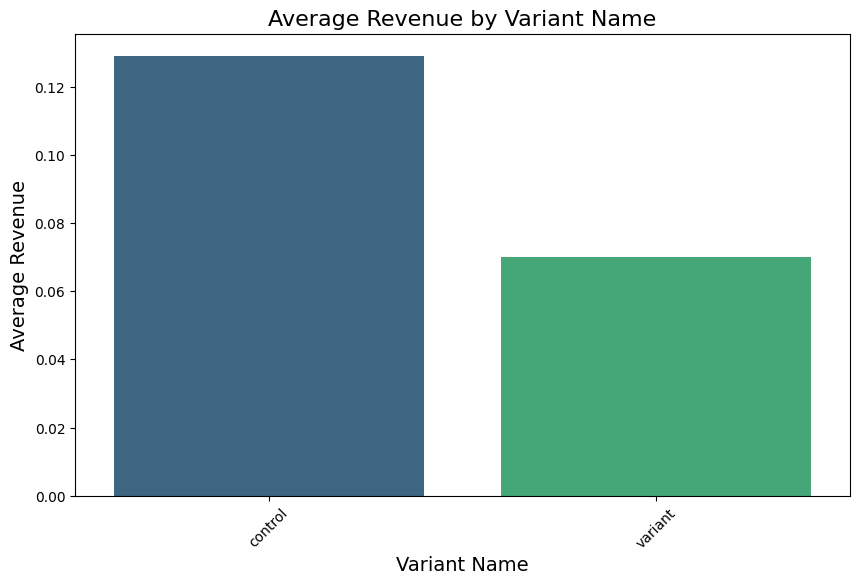

In [12]:
# Calculate average revenue by variant names if not already done
average_revenue = ab_data.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=average_revenue, x='VARIANT_NAME', y='REVENUE', hue='VARIANT_NAME', palette='viridis')

# Add title and labels
plt.title('Average Revenue by Variant Name', fontsize=16)
plt.xlabel('Variant Name', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()